In [1]:
import numpy as np
import scipy
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


from numerical_eqs.pde.sdole import SDOLEPDESolver
from numerical_eqs.pde.fisher import FisherEQSolver

In [10]:
meshsize = 100
mesh = np.linspace(0, 10, meshsize)
u0 = np.zeros(mesh.shape)
t0, t1 = (0, 12)

boundaries = (
    {'type': 'dirichlet', 'f': lambda t: (np.exp(4*t) - 1) / np.exp(4*t)},
    {'type': 'neumann', 'f': lambda t: 0},
)
hc_func = lambda x: 1.0
d_func = lambda x: 0.5

time_points = [1, 4, 8, 12]
plot_points = np.linspace(t0, t1, 10)
explicit_times = {
    'time points': time_points + plot_points.tolist(),
}

def f_func(x, u):
    f_eval = np.maximum(u*(1-u), 0)
    df = np.where( u*(1-u) > 0, 1-2*u, 0 )
    return f_eval


pde = FisherEQSolver(
    heat_capacity_func = hc_func,
    diffusion_func     = d_func,
    f_func             = f_func
)

res = pde.solve(
    mesh = mesh,
    u0 = u0,
    t0 = t0,
    t1 = t1,
    # Add in boundaries
    boundaries = boundaries,
    
    explicit_times = explicit_times,
    # Show the progress bar
    progress = True
)


sol_y = res['ys']
sol_t = res['time']



100%|██████████| 12.0/12 [00:00<00:00, 32.22it/s]               


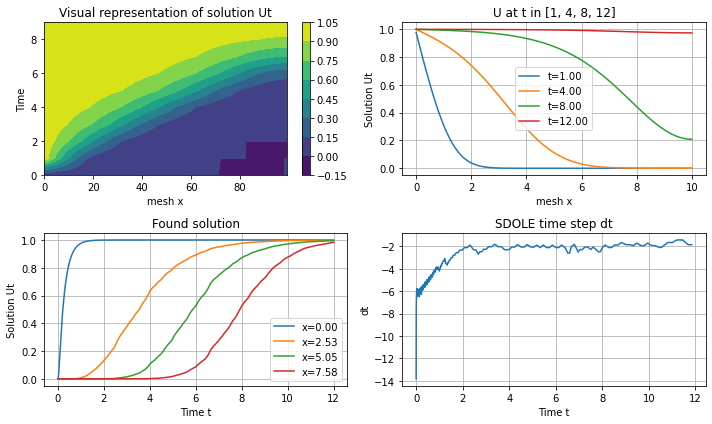

In [11]:


k = 3
cols = 2
rows = int(np.ceil(k / cols))
fig, axs = plt.subplots(rows, cols, figsize=(5*cols,3*rows))
axs = np.asarray(axs).flatten()


j = np.zeros(sol_t.shape)
for t in plot_points:
    j = np.logical_or(j, sol_t == t)

# Find times that satisfy
times = np.nonzero( j )
# Plot this using the colorbar
cf = axs[0].contourf(
    sol_y[times, :][0,:,:]
)
fig.colorbar(cf, ax=axs[0])
axs[0].set_title('Visual representation of solution Ut')
axs[0].set_xlabel('mesh x')
axs[0].set_ylabel('Time')





j = np.zeros(sol_t.shape)
for t in time_points:
    j = np.logical_or(j, sol_t == t)

# Find times that satisfy
times = np.asarray(np.nonzero( j )).flatten()

for i, t in zip(times, time_points):
    axs[1].plot(
        mesh,
        sol_y[i,:],
        label='t={0:.2f}'.format(t)
    )

axs[1].set_title('U at t in {0}'.format(time_points))
axs[1].set_xlabel('mesh x')
axs[1].set_ylabel('Solution Ut')
axs[1].legend()
axs[1].grid()





for i in range(0, len(mesh), 25):
    axs[2].plot(
        sol_t,
        sol_y[:,i],
        label='x={0:.2f}'.format(mesh[i])
    )
axs[2].set_title('Found solution')
axs[2].set_xlabel('Time t')
axs[2].set_ylabel('Solution Ut')
axs[2].legend()
axs[2].grid()



axs[3].plot(
    sol_t[:-1],
    np.log(sol_t[1:] - sol_t[:-1]),
)
axs[3].set_title('SDOLE time step dt')
axs[3].set_xlabel('Time t')
axs[3].set_ylabel('dt')
axs[3].grid()

fig.tight_layout()
plt.show()

None